# Part f - Introducing real data

In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import numpy as np
import pandas as pd
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from src.features.polynomial import PolynomialFeatures
from src.models.models import OLS, Ridge
from src.evaluation.evaluation import mse, r_squared

In [3]:
terrain1 = imread('../data/raw/SRTM_data_Norway_1.tif')
# Warnings here. Might there be another way?

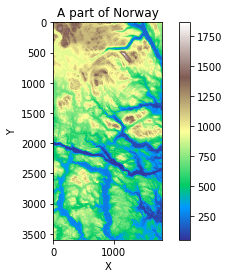

In [4]:
plt.figure()
plt.title('A part of Norway')
plt.imshow(terrain1, cmap='terrain')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.savefig('../reports/figures/map.png')
plt.show()

In [5]:
# scale array
ss = StandardScaler()
terrain2 = ss.fit_transform(terrain1.astype(float))

In [6]:
# Preparations for constructing the feature matrix
x = np.arange(terrain2.shape[1])
y = np.arange(terrain2.shape[0])
x, y = np.meshgrid(x, y)
x, y = x.ravel(), y.ravel()
z = terrain2.ravel()

We now want to construct the feature matrix. We choose to construct it all the way up to the tenth degree, and then to slice it in order to perform lower-degree regression.

In [33]:
# Constructing the feature matrix
pf = PolynomialFeatures(8)
X = pf.fit_transform(np.c_[x.reshape((-1, 1)), y.reshape((-1, 1))], ['x', 'y'])


In the following cell, we fit polynomials up to the eight degree to the data. We perform cross-validation on a test set and obtain a test MSE score:

In [37]:
terms = 1
mse_scores = np.zeros(8)
col_names = ['MSE', 'R^2']
output_df = pd.DataFrame(columns=col_names)

print('%-30s|%-10s|%-10s' %('Degree', 'MSE', 'R^2'))
print('-'*50)

for degree in range(1, 9):
    terms = terms + degree + 1
    X_all = X[:, :terms]
    X_train, X_test, z_train, z_test = train_test_split(X_all, z, test_size=0.3, random_state=23)
    ols = OLS()
    ols.fit(X_train, z_train)
    predictions = ols.predict(X_test)
    mse_value = mse(z_test, predictions)
    r_2_value = r_squared(z_test, predictions)
    print('%-30d|%-10f|%-10f' %(degree, mse_value, r_2_value))
    output_df = output_df.append(pd.DataFrame(data=[[mse_value, r_2_value]], columns=col_names, index=[degree]))
    

Degree                        |MSE       |R^2       
--------------------------------------------------
1                             |0.607683  |0.392322  
2                             |0.571219  |0.428786  
3                             |0.535714  |0.464290  
4                             |0.521526  |0.478478  
5                             |0.512611  |0.487394  
6                             |0.508212  |0.491792  
7                             |0.508126  |0.491878  
8                             |0.508119  |0.491885  


In [39]:
# Write results to file
output_df.to_csv('../reports/csv_files/6_mse_r2_score_ols_real_data.csv')

In [46]:
# Ridge
lambda_values = np.linspace(0.01, 0.2, 5)
for lam in lambda_values:
    ridge = Ridge(lam)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=23)
    ridge.fit(X_train, z_train)
    predictions = ridge.predict(X_test)
    mse_value = mse(z_test, predictions)
    print(mse_value)

0.5081186779959462
0.5081186782944288
0.5081186785931096
0.5081186788920429
0.5081186791916137


In [51]:
# Lasso
lambda_values = np.linspace(1, 2, 5)
for lam in lambda_values:
    lasso = Lasso(lam, max_iter=10)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=23)
    lasso.fit(X_train, z_train)
    predictions = lasso.predict(X_test)
    mse_value = mse(z_test, predictions)
    print(mse_value)

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5510310187887707


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5510748692020537


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5511191446194836


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5511638450410619


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5512089704667869
